# Estimating multivariate distributions with Gaussian copulas

In [1]:
from elfi.methods.copula import GaussianCopula
from elfi.visualization.visualization import *
import scipy.stats as ss
import elfi.diagnostics as diag
%matplotlib inline

## First example: a bivariate Gaussian

In [2]:
cov = np.array([[1, 0.5], [0.5, 1]])
mean = np.array([1, 5])
nobs = 5000

# The actual distribution
N = ss.multivariate_normal(mean=mean, cov=cov)

# A sample from the bivariate Gaussian
X = N.rvs(size=nobs)

The Gaussian copula estimate for the full distribution is obtained by estimating the correlations between the different variables using an empirical covariance matrix. The univariate marginals are approximated by kernel density estimation.

In [3]:
cov_est = np.cov(X, rowvar=False)
gc = GaussianCopula(cov=cov_est, marginal_samples=X)

## Visual comparison

For comparison, we contrast the values of the logarithm of the actual probability density with the corresponding estimate. To do this, we evaluate the `logpdf` method of the respective objects on a grid. The grid is specified as a list of two tuples. Each tuple specifying the minimum value, the maximum value, and the number of points on one axis.

In [4]:
n_points = 30
mins = np.min(X, axis=0)
maxs = np.max(X, axis=0)

spec = [(mins[0], maxs[0], n_points),
        (mins[1], maxs[1], n_points)]

Let us first compare the contour plots of logpdfs. The actual distribution is plotted with solid lines and the estimated distribution with dashed lines.

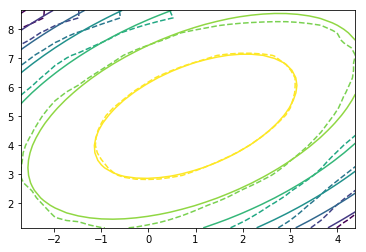

In [5]:
overlay_contours(gc, N, spec)

Here is a plot of the absolute difference between the two distributions.

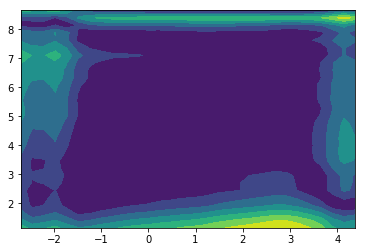

In [6]:
plot_diff(gc, N, spec)

## Numerical comparison

We can also compare the Kullback-Leibler divergence and L1-distance between the actual distribution and the estimate.

In [7]:
diag.kl_div(gc, N, spec)

0.0032924761278613551

In [8]:
diag.l1_dist(gc, N, spec, method='pdf')

0.79618528554386137

# Drawing samples

We can define a joint distribution with specific marginal distributions and correlations between them. A covariance matrix is used for the specification as it carries more information than the correlation matrix.

For example, let us define a three-dimensional distribution with normal, beta and uniform distributions as the marginals.

In [21]:
p = 0.8
cov = np.array([[1, p],
                [p, 1]])

The marginal distributions can be any objects that implement `cdf` (cumulative distribution function) and `ppf` (percent point/quantile function) methods. Here we are using distributions from Scipy.

In [22]:
F = GaussianCopula(cov=cov, marginals=[ss.norm(0,1), ss.beta(5, 2)]) 

The API for the distribution is similar to that of Scipy distributions. We can, for example sample values from the distribution using the `rvs` method.

In [23]:
S = F.rvs(10000)

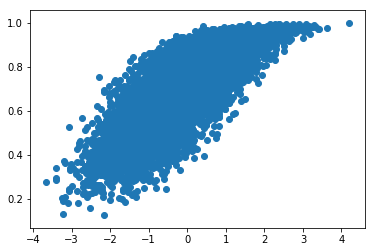

In [24]:
plt.scatter(S[:, 0], S[:, 1])

The marginal distributions are as specified.

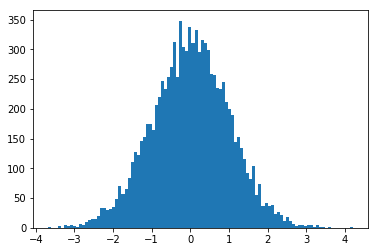

In [33]:
norm_hist = plt.hist(S[:, 0], 100)

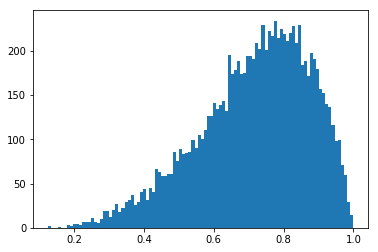

In [34]:
beta_hist = plt.hist(S[:, 1], 100)

## Another estimation

Now we can estimate the previously specified distribution as we did previously.

In [35]:
cov_est = np.cov(S, rowvar=False)
Fhat = GaussianCopula(cov=cov, marginal_samples=S)

In [36]:
n_points = 30
mins = np.min(S, axis=0)
maxs = np.max(S, axis=0)

spec = [(mins[0], maxs[0], n_points),
        (mins[1], maxs[1], n_points)]

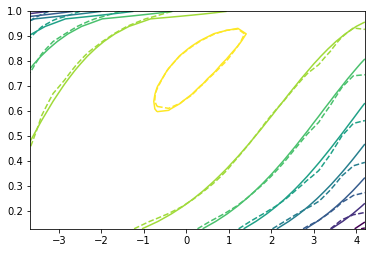

In [37]:
overlay_contours(Fhat, F, spec)

## Drawing samples from the estimated distribution (EXPERIMENTAL)

Drawing samples is experimental at the moment. It is not very efficient as it requires the numerical inversion of a numerical cumulative distribution function. There might also be some numerical issues near the extreme values of the cumulative distribution function. The efficiency can perhaps be improved by using logspline density estimation.

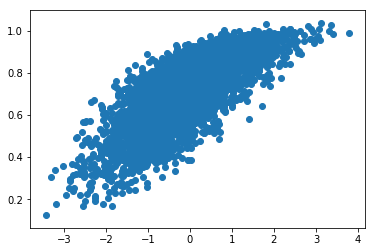

In [39]:
S_hat = Fhat.rvs(4000)
sample_plot = plt.scatter(S_hat[:, 0], S_hat[:, 1])

# Distributions with more than two dimesions

For illustrative purposes the previous examples were two-dimensional. However, it is possible to use an arbitrary number of dimensions.

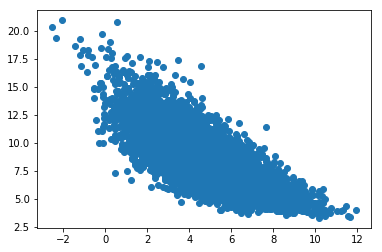

In [95]:
cov = ss.invwishart.rvs(df=3, scale=np.eye(3))
G = GaussianCopula(cov=cov, marginals=[ss.norm(5,1), ss.beta(5,2), ss.gamma(5, 3)])

Y = G.rvs(10000)
scatter_plot = plt.scatter(Y[:, 0], Y[:, 2])

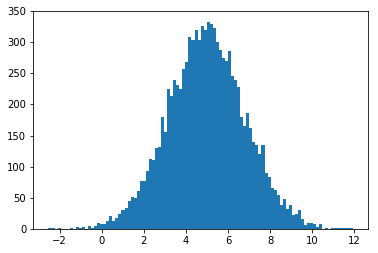

In [96]:
norm_hist = plt.hist(Y[:, 0], 100)

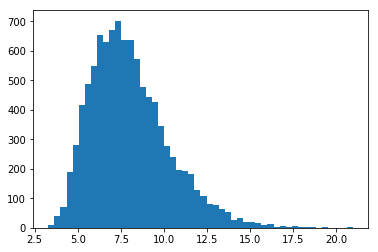

In [97]:
# numerical issues?
ys = Y[np.isfinite(Y[:, 2]), 2]
gamma_hist = plt.hist(ys, 50)

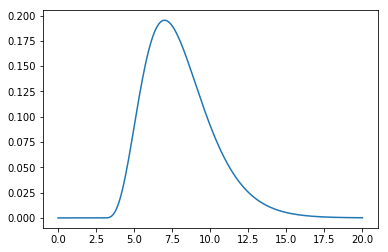

In [80]:
t = np.linspace(0, 20, 200)
plt.plot(t, ss.gamma(5, 3).pdf(t))